**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

Importing the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST Data from keras.datasets

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# printing the 10 image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


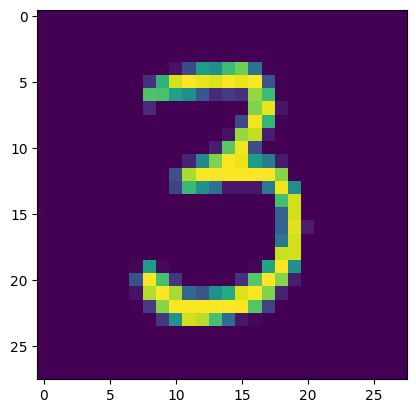

3


In [8]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# printing the corresponding label

print(Y_train[50])

Image Labels

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

ONE HOT ENCODING

- 0 - 1000
- 1 - 0100
- 2 - 0010
- 3 - 0001

In [12]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [14]:
X_train [10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Building the Neural Network

In [15]:
# setting up some layers of the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [16]:
# compiling this NN

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2935 - accuracy: 0.9160
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1330 - accuracy: 0.9594
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0989 - accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0487 - accuracy: 0.9846
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

Training Data Accuracy = 98.8%

**Accuracy on Test Data:**

In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0948 - accuracy: 0.9740
0.9739999771118164


Test Data Accuracy = 97.3%

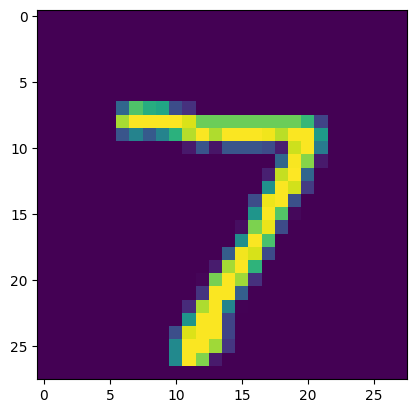

In [19]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [20]:
print(Y_test[0])

7


In [21]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [22]:
print(Y_pred.shape)

(10000, 10)


In [23]:
print(Y_pred[0])

[8.4118225e-02 7.6690689e-02 7.1220922e-01 9.9751657e-01 3.8619516e-09
 6.5288045e-02 8.4276699e-06 9.9999887e-01 6.3842803e-01 8.6548817e-01]


In [24]:
# converting the prediction probabilities to class label

label_one = np.argmax(Y_pred[0])
print(label_one)

7


In [25]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

- Y_test -> true labels in the dataset
- Y_pred_labels -> predicted labels

**CONFUSION MATRIX**

In [26]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [27]:
print(conf_mat)

tf.Tensor(
[[ 965    0    2    0    2    3    2    2    3    1]
 [   0 1124    2    2    0    2    2    0    3    0]
 [   2    5  997   10    1    1    1    5   10    0]
 [   1    1    1  980    0   14    0    6    5    2]
 [   0    0    0    1  964    3    5    1    0    8]
 [   1    0    1   11    2  864    4    1    2    6]
 [   1    1    0    0    2   12  938    0    4    0]
 [   1    4   12    2    2    0    0  997    0   10]
 [   1    3    1    3    6   10    3    3  937    7]
 [   2    2    0    6   15    2    0    6    3  973]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

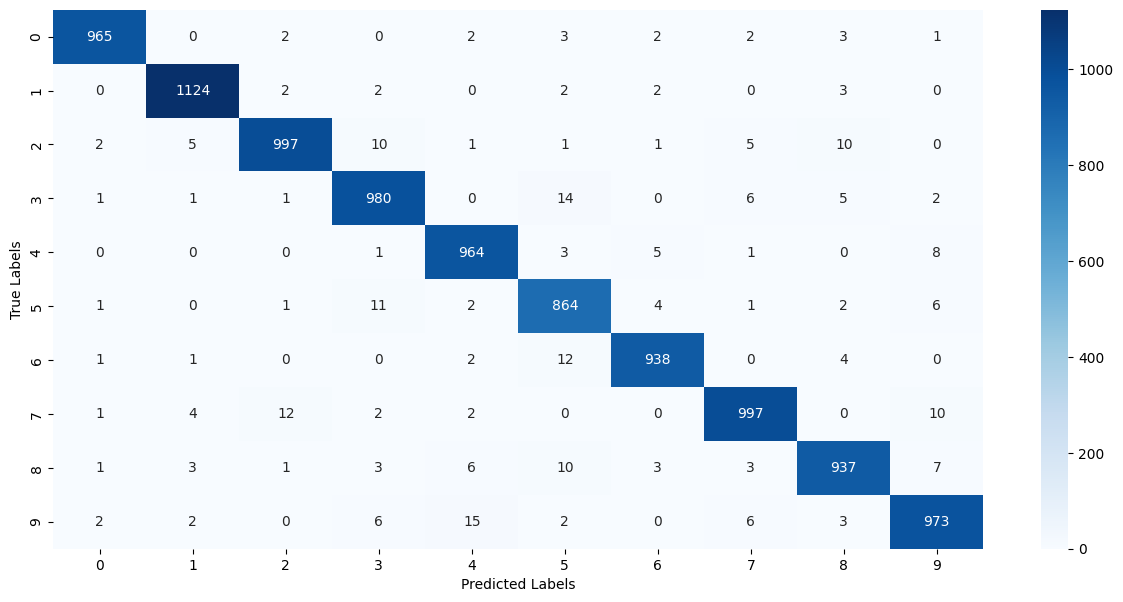

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

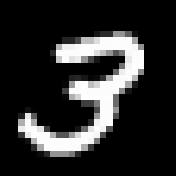

1/1 [==============================] - 0s 30ms/step
3


In [50]:
input_image_path = '/content/mnist_image.png'

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)